# EJERCICIO 6
------------------------

### Genere el algoritmo genetico de

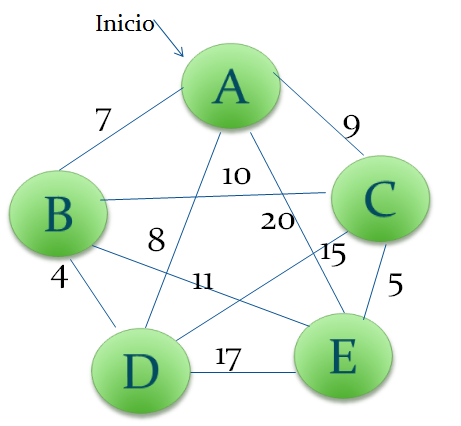

Ordenando los datos para evaluacion

In [14]:
import numpy as np

cities = ['A', 'B', 'C', 'D', 'E']
num_cities = len(cities)
print(f"El numero de ciudades es: {num_cities}")
distances = np.array([
    [0, 7, 9, 10, 20],
    [7, 0, 10, 4, 11],
    [9, 10, 0, 15, 5],
    [8, 4, 15, 0, 17],
    [20, 11, 5, 17, 0]
])

El numero de ciudades es: 5


Preparando el algoritmo

In [16]:
import random
import numpy as np

def calculate_route_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    total_distance += distances[route[-1]][route[0]]  # Regresar al punto de inicio
    return total_distance

def generate_random_route(num_cities):
    route = list(range(num_cities))
    random.shuffle(route)
    return route

def generate_initial_population(population_size, num_cities):
    return [generate_random_route(num_cities) for _ in range(population_size)]


def tournament_selection(population, distances, k=3):
    selected = random.sample(population, k)
    selected.sort(key=lambda route: calculate_route_distance(route, distances))
    return selected[0]

def crossover(parent1, parent2):
    child = [-1] * len(parent1)
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child[start:end] = parent1[start:end]
    pointer = 0
    for city in parent2:
        if city not in child:
            while child[pointer] != -1:
                pointer += 1
            child[pointer] = city
    return child

def mutate(route, mutation_rate):
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]

def genetic_algorithm(distances, population_size, generations, mutation_rate):
    num_cities = len(distances)
    population = generate_initial_population(population_size, num_cities)
    
    for generation in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1 = tournament_selection(population, distances)
            parent2 = tournament_selection(population, distances)
            child = crossover(parent1, parent2)
            mutate(child, mutation_rate)
            new_population.append(child)
        population = new_population
    
    best_route = min(population, key=lambda route: calculate_route_distance(route, distances))
    return best_route, calculate_route_distance(best_route, distances)

population_size = 50
generations = 1000
mutation_rate = 0.01

best_route, best_distance = genetic_algorithm(distances, population_size, generations, mutation_rate)

best_route_named = [cities[i] for i in best_route]

print(f"Ruta mas corta: {best_route_named}")
print(f"Distancia de la ruta: {best_distance}")


Ruta mas corta: ['D', 'A', 'C', 'E', 'B']
Distancia de la ruta: 37
